In [1]:
import pandas as pd
import os
from ROOT import TFile
from root_numpy import tree2array
from IPython.display import display

from matplotlib import pyplot as plt

Welcome to JupyROOT 6.16/00


/Users/rpezoa/opt/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.17.2 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


### read root files

In [2]:
def read_root_file(file):
    rfile = TFile(file) #root file
    intree = rfile.Get("Nominal") #get tree from root file
    array = tree2array(intree)
    df = pd.DataFrame(array)
    return df

## Getting dataframes from root files

In [3]:
root_file_path = "../processed_data/all_2000_full.root"
#data_file_path = "../raw_data/data.root"
df = read_root_file(root_file_path)
#df_data =read_root_file(data_file_path)
#display(df)

## Filtering per region

In [9]:
region = "SR"
tag = 2
df = df[df["m_region"] == region]
df = df[df["m_FJNbtagJets"] == tag]
print(df.columns)

#df_data = df_data[df_data["m_region"]==region]
#df_fakes = df_data[df_data["sample"]=="fakes"]
#df_data = df_data[df_data["sample"]!="fakes"]

#print(df_fakes["EventWeight"].values.sum())
#print(df_fakes["EventWeight"].values.sum()  -3.6256995)

#display(df_data)
#display(df)

Index(['sample', 'EventWeightNoXSec', 'EventWeight', 'EventNumber', 'm_region',
       'm_FJNbtagJets', 'm_AntiBTag', 'm_AntiTauTag', 'm_FJpt', 'm_FJeta',
       'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm',
       'm_DTpt_Eff', 'm_DTeta_Eff', 'm_DTphi_Eff', 'm_DTm_Eff',
       'm_DTpt_ConEff', 'm_DTeta_ConEff', 'm_DTphi_ConEff', 'm_DTm_ConEff',
       'm_DTpt_ConVis', 'm_DTeta_ConVis', 'm_DTphi_ConVis', 'm_DTm_ConVis',
       'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt', 'm_hhm_Coll', 'm_hhm_Eff', 'm_hhm_ConEff', 'm_hhm_ConVis'],
      dtype='object')


fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Wbb 6 0.11941259
Zcc 6 0.25472373
Zbc 4 0.08608626
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
Wbl 1 0.019197725


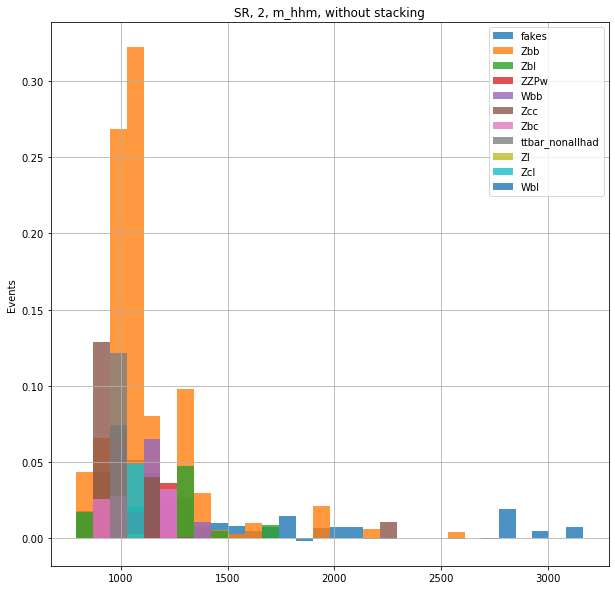

In [14]:
# Selecting one variable: "m_hhm"

df0 = df[['sample','m_hhm',"EventWeight"]]
df1 = df0[df0["sample"]!="data"]
df_data = df0[df0["sample"]=="data"]

df_signal = df0[df0["sample"]=="Xtohh2000_Hw"]
signal_weights = df_signal["EventWeight"].values

df1 = df1[df1["sample"]!="Xtohh2000_Hw"]

hmin=df0["m_hhm"].values.min()
hmax=df0["m_hhm"].values.max()

d = df1["sample"].value_counts()
stack_list = []
weights_list = []
names = []
plt.figure(figsize=(10,10))
plt.title( region + ", " + str(tag) + ", m_hhm, without stacking")   
for samp, number in d.items():
    df_per_samp = df1[df1["sample"] == samp] #dataframe containing 
                                             #only one kind of sample
    print(samp, number, df_per_samp["EventWeight"].values.sum())
    #print("sample:",samp)
    #display(df_per_samp["m_hhm"].values)
    
    stack_list.append(df_per_samp["m_hhm"].values)
    weights_list.append(df_per_samp["EventWeight"].values)
    names.append(samp)
    
    
    plt.hist(df_per_samp["m_hhm"].values, range=(hmin,hmax), 
             weights = df_per_samp["EventWeight"].values, bins=30,
             label=samp,alpha=0.8)

plt.legend(loc="upper right")
plt.ylabel('Events')
plt.grid()
plt.show()

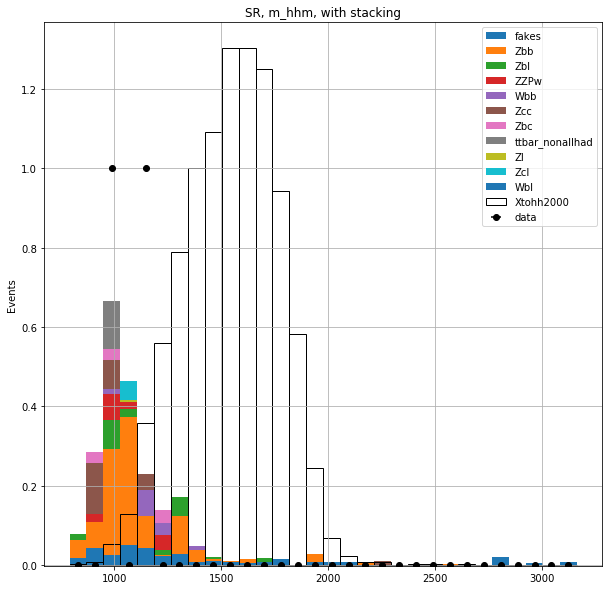

In [15]:


plt.figure(figsize=(10,10))
plt.title("SR, m_hhm, with stacking")   
plt.grid()
plt.hist(stack_list, range=(hmin,hmax), 
             weights = weights_list, bins=30,
         stacked=True,histtype =  'barstacked',label=names)

n, bin_edges,patches = plt.hist(df_signal["m_hhm"].values, range=(hmin,hmax), 
             weights = signal_weights, bins=30,label="Xtohh2000",fill=False,
         color="red")

bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
import numpy as np
counts,bin_edges = np.histogram(df_data["m_hhm"].values,range=(hmin,hmax), 
              bins=30)

plt.errorbar(bin_centres, counts,xerr=False, fmt="ok",label="data")

plt.legend(loc="upper right")
plt.ylabel('Events')
plt.show()



